In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import scipy as sci

## 4.6.1 The Stock Market Data

In [2]:
smarket = pd.read_csv('Smarket.csv')
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [3]:
smarket.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [4]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
smarket.shape

(1250, 9)

In [7]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [11]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [15]:
smarket['DirectionBin'] = smarket.Direction.replace({'Up':1, 'Down':0})

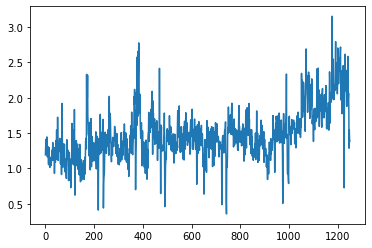

In [20]:
plt.plot('Volume', data = smarket)

## 4.6.2 Logistic Regression

In [33]:
model = sm.GLM.from_formula('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', family = sm.families.Binomial(), data = smarket)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Wed, 21 Oct 2020   Deviance:                       1727.6
Time:                                          15:34:54   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

In [34]:
#getting coefficients
results.params

Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

In [35]:
#probabilities that the market will go up for the first 10 observations
predictions = results.predict()
predictions[0:10]

array([0.49291587, 0.51853212, 0.51886117, 0.48477764, 0.48921884,
       0.49304354, 0.50734913, 0.49077084, 0.48238647, 0.51116222])

In [30]:
#Classifying above predictions based on a 0.5 decision
predictions_nominal = ['Down' if i >= 0.5 else 'Up' for i in predictions]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(smarket['Direction'], predictions_nominal))

[[145 457]
 [141 507]]


In [38]:
print(classification_report(smarket['Direction'], predictions_nominal, digits=3))

              precision    recall  f1-score   support

        Down      0.507     0.241     0.327       602
          Up      0.526     0.782     0.629       648

    accuracy                          0.522      1250
   macro avg      0.516     0.512     0.478      1250
weighted avg      0.517     0.522     0.483      1250



**f1-score**: percent of predictions correct

#### Evaluating Log model using train-test methods

In [39]:
#2001 - 2004 training set
dfTrain = smarket.loc[smarket.Year <= 2004, :]
#2001 - 2005 testing set
dfTest = smarket.loc[smarket.Year > 2004,:]

In [41]:
dfTest.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,DirectionBin
count,252.0,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2005.0,0.015210,0.016425,0.015881,0.022508,0.020627,1.917298,0.013802,0.559524
std,0.0,0.647077,0.646774,0.646735,0.645302,0.645932,0.345494,0.647789,0.497432
min,2005.0,-1.672000,-1.672000,-1.672000,-1.672000,-1.672000,0.724940,-1.672000,0.000000
25%,2005.0,-0.415250,-0.415250,-0.415250,-0.391250,-0.415250,1.653880,-0.437750,0.000000
50%,2005.0,0.056000,0.056000,0.051500,0.056000,0.056000,1.896905,0.056000,1.000000
75%,2005.0,0.429500,0.429500,0.429500,0.442000,0.442000,2.147020,0.429500,1.000000
max,2005.0,1.974000,1.974000,1.974000,1.974000,1.974000,3.152470,1.974000,1.000000


In [43]:
dfTrain.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,DirectionBin
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,2002.515030,0.000962,0.000762,-0.001861,-0.003634,0.001818,1.367457,0.000446,0.508016
std,1.114001,1.229666,1.229681,1.232484,1.232725,1.242824,0.267617,1.229614,0.500186
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.922000,0.356070,-4.922000,0.000000
25%,2002.000000,-0.707250,-0.707250,-0.708000,-0.708750,-0.708750,1.211825,-0.707250,0.000000
50%,2003.000000,0.021500,0.021500,0.021500,0.015000,0.021500,1.365050,0.015000,1.000000
75%,2004.000000,0.658500,0.658500,0.658500,0.656750,0.658500,1.508850,0.658500,1.000000
max,2004.000000,5.733000,5.733000,5.733000,5.733000,5.733000,2.775560,5.733000,1.000000


In [48]:
dfTest.shape

(252, 10)

In [49]:
dfTest.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,DirectionBin
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down,0
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down,0
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down,0
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up,1
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down,0


In [ ]:
dfTestIVs = dfTest.loc[:,['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']]

In [55]:
model2 = sm.GLM.from_formula('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', family = sm.families.Binomial(), data = dfTrain )
results2 = model2.fit()
predictions = results2.predict(dfTest)

In [56]:
predictions_nominal = ['Up' if x < 0.5 else 'Down' for x in predictions]
print(classification_report(dfTest['Direction'], predictions_nominal, digits =3))

              precision    recall  f1-score   support

        Down      0.443     0.694     0.540       111
          Up      0.564     0.312     0.402       141

    accuracy                          0.480       252
   macro avg      0.503     0.503     0.471       252
weighted avg      0.511     0.480     0.463       252



In [57]:
print(confusion_matrix(dfTest['Direction'], predictions_nominal))

[[77 34]
 [97 44]]


Error rate is 1-f1

In [58]:
#fitting a model with only lag1 and lag2
model3 = sm.GLM.from_formula('Direction ~ Lag1 + Lag2', family = sm.families.Binomial(), data = dfTrain )
results3 = model3.fit()
predictions3 = results3.predict(dfTest)

In [59]:
predictions_nominal3 = ['Up' if x < 0.5 else 'Down' for x in predictions3]
print(classification_report(dfTest['Direction'], predictions_nominal3, digits =3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [60]:
print(confusion_matrix(dfTest['Direction'], predictions_nominal3))

[[ 35  76]
 [ 35 106]]


In [63]:
#accuracy of the model is 56%
#accuracy if just selected "Up"
dfTest.DirectionBin.mean()

0.5595238095238095

suppose that we want to predict the returns associated with **particular values** of ${\tt Lag1}$ and ${\tt Lag2}$. In particular, we want to predict Direction on a day when ${\tt Lag1}$ and ${\tt Lag2}$ equal 1.2 and 1.1, respectively, and on a day when they equal 1.5 and −0.8. We can do this by passing a new data frame containing our test values to the ${\tt predict()}$ function.

In [67]:
results3.predict(pd.DataFrame({'Lag1':[1.2,1.5], 'Lag2':[1.1,-0.8]}))
#day 1, 52% chance of going down (48% chance of going up)
#day 2 51% chance of going down (49% chance of going up)

0    0.520854
1    0.503906
dtype: float64

## 4.6.3 Linear Discriminant Analysis

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score

In [77]:
X_train = dfTrain.loc[:,['Lag1','Lag2']]
Y_train = dfTrain.loc[:,['Direction']]

X_test = dfTest.loc[:,['Lag1','Lag2']]
Y_test = dfTest.loc[:,['Direction']]

In [78]:
#flattening Y_train using ravel()
flatY_Train = np.ravel(Y_train)

In [79]:
#fitting LDA
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, flatY_Train)

In [80]:
print(model.priors_)

[0.49198397 0.50801603]


The LDA output indicates prior probabilities of ${\hat{\pi}}_1 = 0.492$ and ${\hat{\pi}}_2 = 0.508$; in other words, 49.2% of the training observations correspond to days during which the market went down.

In [81]:
print(model.means_)

[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]



The above provides the group means; these are the average of each predictor within each class, and are used by LDA as estimates of $\mu_k$. These suggest that there is a tendency for the previous 2 days’ returns to be negative on days when the market increases, and a tendency for the previous days’ returns to be positive on days when the market declines.

In [83]:
#coefficients for LDA
print(model.scalings_)

[[-0.64201904]
 [-0.51352928]]


The coefficents of linear discriminatnts output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule.  In other words, these are the multiplers of the elements of X = x in the LDA equation.  

If $-0.642\times{Lag1} -0.514\times{Lag2}$ is large, then the LDA classifier will predict a market increase.  If it is small, a market decrease. 